In [11]:
import HEKAimport
import glob
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import scipy
pd.set_option('display.max_rows', 8000)
#plt.rcParams.update({'font.size': 16})
#plt.rcParams.update({'lines.markersize': 8})
import matplotlib
import docx
from docx.shared import Pt


color_palette = sns.color_palette("colorblind")
sns.set_theme(palette=color_palette, font="Arial", font_scale=1.0, style="white")
plt.style.use('../mpl_style_template/paper.mplstyle')


#styles for error and markers in sns.lineplot

thin_custom_lw = 1.2
custom_lw = thin_custom_lw/0.65

filled_marker_style = dict(marker='o',  markersize=5,
                           color='k',
                           #markerfacecolor='green',
                           markeredgecolor='k',
                          markeredgewidth=thin_custom_lw)

filled_marker_style_white = dict(marker='o',  markersize=5,
                           color='w',
                           markerfacecolor='w',
                           markeredgecolor='w',
                          markeredgewidth=custom_lw)


error_style_white = {"capsize": 4.4, 
                "ecolor": "w",
               "barsabove":False, 
               "elinewidth":custom_lw, 
               "capthick":custom_lw,
                    "zorder": 8}

error_style = {"capsize": 4, 
                "ecolor": "k",
                "barsabove":False, 
                "elinewidth":thin_custom_lw, 
                "capthick":thin_custom_lw,
                "zorder": 9}




In [2]:
n_boot = int(np.genfromtxt("..\cutoffs\\n_boot.csv", delimiter=','))
print(n_boot)
seed = int(np.genfromtxt("..\cutoffs\seed.csv", delimiter=','))
print(seed)

10000
10


In [3]:
def IV_func(V, G, V_rev, V_half, k):
    return G*(V-V_rev)/(1+np.exp(-(V-V_half)/k))

In [4]:
def make_dataframe(data_df):

    data=pd.DataFrame()
    for i in data_df["Name2"].unique():
        if len(data_df[data_df["Name2"]==i]["Series"].unique())==2:
            print(i)
            a=data_df[(data_df["Name2"]==i) \
                       & (data_df["Series"]=='IV-short')][["Name2","animal","V_V","I_pA"]].set_index('V_V')
            a=a.rename(columns={"I_pA": "I_pA_IV"})
            b=data_df[(data_df["Name2"]==i) \
                       & (data_df["Series"]=='IV-40short')][["Name2","animal","V_V","I_pA"]].set_index('V_V')
            b=b.rename(columns={"I_pA": "I_pA_IV40"})
            b=b.rename(columns={"Name2": "Name2_IV40"})
            b=b.rename(columns={"animal": "animal_IV40"})

            c=pd.concat([a,b],axis=1)
            #c["I_pA_IV40"]=c["I_pA_IV40"].fillna(int(0))
            c["I_pA_IV_diff"]=c["I_pA_IV"]-c["I_pA_IV40"]
            c=c.reset_index(level=0)

            data=pd.concat([data,c],axis=0, ignore_index=True)
    data=data.rename(columns={"V_V": "U_mV"})
    data["U_mV"]=data["U_mV"]*1000
    data["U_mV"]=data["U_mV"].astype(int)

    return data

In [21]:
#### WT ####

# load WT 'IV-short' and 'IV40-short' files, add column with unique identifier for recording
data_IV_WT=pd.read_excel("data_IV_WT.xlsx", index_col=0)
data_IV_40_WT=pd.read_excel("data_IV_40_WT.xlsx", index_col=0)
data_IV_WT["Name2"] = data_IV_WT["animal"]+"_"+data_IV_WT["Group"]+"_"+data_IV_WT["Group_Index"].astype(str)
data_IV_40_WT["Name2"] = data_IV_40_WT["animal"]+"_"+data_IV_40_WT["Group"]+"_"+data_IV_40_WT["Group_Index"].astype(str)

# append 'IV-short' to 'IV40-short' files
data_total_IV_WT=data_IV_WT.append(data_IV_40_WT)

# calculate IV-IV40 for each trace 
data_WT = make_dataframe(data_total_IV_WT)
data_WT

4537_WT_E-9_1
4537_WT_E-10_2
4720_WT_E-3_1
4720_WT_E-6_4
4720_WT_E-7_5
4721_WT_E-10_3
4721_WT_E-12_5


,U_mV,Name2,animal,I_pA_IV,Name2_IV40,animal_IV40,I_pA_IV40,I_pA_IV_diff
0,-95,4537_WT_E-9_1,4537_WT,-7.643216,NaN,NaN,NaN,NaN
1,-85,4537_WT_E-9_1,4537_WT,-5.707545,NaN,NaN,NaN,NaN
2,-75,4537_WT_E-9_1,4537_WT,-13.656141,NaN,NaN,NaN,NaN
3,-65,4537_WT_E-9_1,4537_WT,-6.961285,NaN,NaN,NaN,NaN
4,-55,4537_WT_E-9_1,4537_WT,-8.870684,4537_WT_E-9_1,4537_WT,4.845287,-13.715971
5,-45,4537_WT_E-9_1,4537_WT,-21.382146,4537_WT_E-9_1,4537_WT,7.072917,-28.455063
6,-35,4537_WT_E-9_1,4537_WT,-59.698866,4537_WT_E-9_1,4537_WT,-15.615990,-44.082876
7,-25,4537_WT_E-9_1,4537_WT,-86.107758,4537_WT_E-9_1,4537_WT,-8.830449,-77.277309
8,-15,4537_WT_E-9_1,4537_WT,-81.071001,4537_WT_E-9_1,4537_WT,-13.048319,-68.022682
9,-5,4537_WT_E-9_1,4537_WT,-69.955152,4537_WT_E-9_1,4537_WT,-36.087316,-33.867836


In [22]:
#calculate ci 95%
var = ["I_pA_IV_diff", "I_pA_IV40"]
pos = data_WT["U_mV"].unique()
#ci_df = pd.DataFrame()
ci_df_allV_WT = pd.DataFrame()
for p in pos:
    ci_df = pd.DataFrame()
    for v in var:
        vals = data_WT[(data_WT["U_mV"]==p)].dropna(subset=[v])[v].values
        if vals.size > 0:
            res = scipy.stats.bootstrap((vals,),
                                        np.mean,
                                        confidence_level=0.95,
                                        n_resamples=int(n_boot),
                                        random_state=int(seed),
                                       method="percentile")
            #print(res.confidence_interval)
            ci_l, ci_u = res.confidence_interval

        else:
            ci_l = np.nan
            ci_u = np.nan

        ci_lower = pd.Series(data=ci_l, index=[p], name=f"{v}_ci95_lower")
        ci_upper = pd.Series(data=ci_u, index=[p], name=f"{v}_ci95_upper")

        mean_ca = pd.Series(data=data_WT[(data_WT["U_mV"]==p)][v].mean(),
                            index=[p], name=v)
                           
        ci_df = pd.concat((ci_df, mean_ca, ci_lower, ci_upper), axis=1)
        ci_df.index = [p]
    ci_df_allV_WT = pd.concat((ci_df_allV_WT, ci_df), axis=0)
ci_df_allV_WT

,I_pA_IV_diff,I_pA_IV_diff_ci95_lower,I_pA_IV_diff_ci95_upper,I_pA_IV40,I_pA_IV40_ci95_lower,I_pA_IV40_ci95_upper
-95,NaN,NaN,NaN,NaN,NaN,NaN
-85,NaN,NaN,NaN,NaN,NaN,NaN
-75,NaN,NaN,NaN,NaN,NaN,NaN
-65,NaN,NaN,NaN,NaN,NaN,NaN
-55,-16.665606,-21.207753,-12.938132,-0.166628,-4.473306,4.008796
-45,-34.305029,-53.886694,-15.060169,-0.679856,-10.105890,8.532671
-35,-49.403031,-70.534183,-29.437876,-8.656746,-13.413205,-3.428828
-25,-48.189695,-71.215520,-25.163869,-18.711759,-26.757288,-11.478874
-15,-45.911943,-65.153390,-25.571222,-28.287117,-44.046301,-14.777039
-5,-42.355015,-66.828063,-23.586696,-31.179349,-45.935948,-17.708323


In [23]:
data_WT.groupby(["U_mV"]).nunique()

,Name2,animal,I_pA_IV,Name2_IV40,animal_IV40,I_pA_IV40,I_pA_IV_diff
U_mV,,,,,,,
-95,6,3,6,0,0,0,0
-85,7,3,7,0,0,0,0
-75,7,3,7,0,0,0,0
-65,7,3,7,0,0,0,0
-55,7,3,7,7,3,7,7
-45,7,3,7,7,3,7,7
-35,7,3,7,7,3,7,7
-25,7,3,7,7,3,7,7
-15,7,3,7,7,3,7,7


In [24]:
WT_n_cells = data_WT["Name2"].nunique()
WT_n_animals = data_WT["animal"].nunique()
print(f"WT number of cells: {WT_n_cells}")
print(f"WT number of animals: {WT_n_animals}")


WT number of cells: 7
WT number of animals: 3


In [25]:
#### KO ####

# load KO 'IV-short' and 'IV40-short' files, add column with unique identifier for recording
data_IV_KO=pd.read_excel("data_IV_KO.xlsx", index_col=0)
data_IV_40_KO=pd.read_excel("data_IV_40_KO.xlsx", index_col=0)
data_IV_KO["Name2"] = data_IV_KO["animal"]+"_"+data_IV_KO["Group"]+"_"+data_IV_KO["Group_Index"].astype(str)
data_IV_40_KO["Name2"] = data_IV_40_KO["animal"]+"_"+data_IV_40_KO["Group"]+"_"+data_IV_40_KO["Group_Index"].astype(str)

#append 'IV-short' to 'IV40-short' files
data_total_IV_KO=data_IV_KO.append(data_IV_40_KO)

# calculate IV-IV40 for each trace 
data_KO = make_dataframe(data_total_IV_KO)
data_KO

4403_KO_E-5_1
4403_KO_E-6_2
4511_KO_E-14_3
4507_KO_E-47_2
4507_KO_E-48_3
4507_KO_E-49_4
4533_KO_E-13_1
4533_KO_E-14_2
4533_KO_E-16_4


,U_mV,Name2,animal,I_pA_IV,Name2_IV40,animal_IV40,I_pA_IV40,I_pA_IV_diff
0,-95,4403_KO_E-5_1,4403_KO,-2.753608,NaN,NaN,NaN,NaN
1,-85,4403_KO_E-5_1,4403_KO,-0.833652,NaN,NaN,NaN,NaN
2,-75,4403_KO_E-5_1,4403_KO,-2.938921,NaN,NaN,NaN,NaN
3,-65,4403_KO_E-5_1,4403_KO,-5.868020,NaN,NaN,NaN,NaN
4,-55,4403_KO_E-5_1,4403_KO,-4.773542,4403_KO_E-5_1,4403_KO,8.557865,-13.331406
5,-45,4403_KO_E-5_1,4403_KO,-9.565886,4403_KO_E-5_1,4403_KO,-7.514090,-2.051797
6,-35,4403_KO_E-5_1,4403_KO,-23.320215,4403_KO_E-5_1,4403_KO,5.471274,-28.791490
7,-25,4403_KO_E-5_1,4403_KO,-19.929585,4403_KO_E-5_1,4403_KO,-10.165802,-9.763783
8,-15,4403_KO_E-5_1,4403_KO,-3.063799,4403_KO_E-5_1,4403_KO,-12.166912,9.103113
9,-5,4403_KO_E-5_1,4403_KO,-19.161104,4403_KO_E-5_1,4403_KO,-15.033072,-4.128032


In [26]:
#calculate ci 95%
var = ["I_pA_IV_diff", "I_pA_IV40"]
pos = data_KO["U_mV"].unique()
#ci_df = pd.DataFrame()
ci_df_allV_KO = pd.DataFrame()
for p in pos:
    ci_df = pd.DataFrame()
    for v in var:
        vals = data_KO[(data_KO["U_mV"]==p)].dropna(subset=[v])[v].values
        if vals.size > 0:
            res = scipy.stats.bootstrap((vals,),
                                        np.mean,
                                        confidence_level=0.95,
                                        n_resamples=int(n_boot),
                                        random_state=int(seed),
                                       method="percentile")
            #print(res.confidence_interval)
            ci_l, ci_u = res.confidence_interval

        else:
            ci_l = np.nan
            ci_u = np.nan

        ci_lower = pd.Series(data=ci_l, index=[p], name=f"{v}_ci95_lower")
        ci_upper = pd.Series(data=ci_u, index=[p], name=f"{v}_ci95_upper")

        mean_ca = pd.Series(data=data_KO[(data_KO["U_mV"]==p)][v].mean(),
                            index=[p], name=v)
                           
        ci_df = pd.concat((ci_df, mean_ca, ci_lower, ci_upper), axis=1)
        ci_df.index = [p]
    ci_df_allV_KO = pd.concat((ci_df_allV_KO, ci_df), axis=0)
ci_df_allV_KO

,I_pA_IV_diff,I_pA_IV_diff_ci95_lower,I_pA_IV_diff_ci95_upper,I_pA_IV40,I_pA_IV40_ci95_lower,I_pA_IV40_ci95_upper
-95,NaN,NaN,NaN,NaN,NaN,NaN
-85,NaN,NaN,NaN,NaN,NaN,NaN
-75,NaN,NaN,NaN,NaN,NaN,NaN
-65,NaN,NaN,NaN,NaN,NaN,NaN
-55,-7.378888,-17.447318,1.281346,-2.132709,-8.398647,4.203976
-45,-13.142999,-22.237262,-6.423409,-4.302229,-6.248737,-2.275415
-35,-10.398247,-19.509773,-2.135765,-5.222397,-10.640813,0.435938
-25,-7.040316,-15.231960,1.471406,-14.054090,-21.388156,-8.532296
-15,-10.624869,-26.617884,3.760597,-18.532389,-23.826626,-13.969000
-5,-5.796867,-19.105725,5.655374,-24.255747,-31.091413,-17.892222


In [8]:
data_KO.groupby(["U_mV"]).nunique()

,Name2,animal,I_pA_IV,Name2_IV40,animal_IV40,I_pA_IV40,I_pA_IV_diff
U_mV,,,,,,,
-95,9,4,9,0,0,0,0
-85,9,4,9,0,0,0,0
-75,9,4,9,0,0,0,0
-65,9,4,9,0,0,0,0
-55,9,4,9,9,4,9,9
-45,9,4,9,9,4,9,9
-35,9,4,9,9,4,9,9
-25,9,4,9,9,4,9,9
-15,9,4,9,9,4,9,9


In [9]:
KO_n_cells = data_KO["Name2"].nunique()
KO_n_animals = data_KO["animal"].nunique()
print(f"KO number of cells: {KO_n_cells}")
print(f"KO number of animals: {KO_n_animals}")

KO number of cells: 9
KO number of animals: 4


In [10]:
#### WT ####

x_WT_IV_diff=data_WT.groupby(["U_mV"])["I_pA_IV_diff"].mean().index
y_WT_IV_diff=data_WT.groupby(["U_mV"])["I_pA_IV_diff"].mean().values
yerr_WT_IV_diff=data_WT.groupby(["U_mV"])["I_pA_IV_diff"].sem().values


x_WT_IV40 = data_WT.groupby(["U_mV"])["I_pA_IV40"].mean().index
y_WT_IV40 = data_WT.groupby(["U_mV"])["I_pA_IV40"].mean().values
yerr_WT_IV40 = data_WT.groupby(["U_mV"])["I_pA_IV40"].sem().values

x_dummy = np.linspace(start=-80, stop=80, num=1000)
#y_dummy = IV_func(x_dummy, 0.51, 60, -60, 3)

print(f"Minimum WT IV diff (pA)")
WT_IV_diff_popt, pcov = scipy.optimize.curve_fit(IV_func, x_WT_IV_diff[4:],\
                            y_WT_IV_diff[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

WT_IV_diff_min = scipy.optimize.fmin(IV_func, -10, args=tuple(WT_IV_diff_popt))

print(f"Minimum WT IV40 (pA)")
WT_IV40_popt, pcov = scipy.optimize.curve_fit(IV_func, x_WT_IV40[4:],\
                            y_WT_IV40[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

WT_IV40_min = scipy.optimize.fmin(IV_func, 0, args=tuple(WT_IV40_popt))


Minimum WT IV diff (pA)
Optimization terminated successfully.
         Current function value: -50.122432
         Iterations: 22
         Function evaluations: 44
Minimum WT IV40 (pA)
Optimization terminated successfully.
         Current function value: -38.417231
         Iterations: 32
         Function evaluations: 64


In [11]:
#### KO ####

x_KO_IV_diff=data_KO.groupby(["U_mV"])["I_pA_IV_diff"].mean().index
y_KO_IV_diff=data_KO.groupby(["U_mV"])["I_pA_IV_diff"].mean().values
yerr_KO_IV_diff=data_KO.groupby(["U_mV"])["I_pA_IV_diff"].sem().values


x_KO_IV40 = data_KO.groupby(["U_mV"])["I_pA_IV40"].mean().index
y_KO_IV40 = data_KO.groupby(["U_mV"])["I_pA_IV40"].mean().values
yerr_KO_IV40 = data_KO.groupby(["U_mV"])["I_pA_IV40"].sem().values

x_dummy = np.linspace(start=-80, stop=80, num=1000)
#y_dummy = IV_func(x_dummy, 0.51, 60, -60, 3)

"""print(f"Minimum KO IV diff (pA)")
KO_IV_diff_popt, pcov = scipy.optimize.curve_fit(IV_func, x_KO_IV_diff[4:],\
                            y_KO_IV_diff[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

KO_IV_diff_min = scipy.optimize.fmin(IV_func, -10, args=tuple(KO_IV_diff_popt))"""

print(f"Minimum KO IV40 (pA)")
KO_IV40_popt, pcov = scipy.optimize.curve_fit(IV_func, x_KO_IV40[4:],\
                            y_KO_IV40[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

KO_IV40_min = scipy.optimize.fmin(IV_func, 0, args=tuple(KO_IV40_popt))

Minimum KO IV40 (pA)
Optimization terminated successfully.
         Current function value: -33.152334
         Iterations: 33
         Function evaluations: 66


In [12]:
x_WT_IV_diff

Int64Index([-95, -85, -75, -65, -55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45,
            55, 65, 75],
           dtype='int64', name='U_mV')

In [13]:
y_WT_IV_diff

array([         nan,          nan,          nan,          nan,
       -16.66560552, -34.30502873, -49.40303078, -48.18969468,
       -45.91194277, -42.35501464, -31.96970383, -22.76743338,
        -6.78698684, -12.85688733,   0.4698923 ,  -2.768085  ,
         6.33999562,  20.75550033])

In [14]:
data_WT.groupby(["U_mV"])["I_pA_IV_diff"].mean()

U_mV
-95          NaN
-85          NaN
-75          NaN
-65          NaN
-55   -16.665606
-45   -34.305029
-35   -49.403031
-25   -48.189695
-15   -45.911943
-5    -42.355015
 5    -31.969704
 15   -22.767433
 25    -6.786987
 35   -12.856887
 45     0.469892
 55    -2.768085
 65     6.339996
 75    20.755500
Name: I_pA_IV_diff, dtype: float64

In [15]:
data_WT.groupby(["U_mV"])["I_pA_IV_diff"].std()

U_mV
-95          NaN
-85          NaN
-75          NaN
-65          NaN
-55     6.101147
-45    28.188700
-35    30.417355
-25    34.372187
-15    29.430458
-5     32.534519
 5     33.439112
 15    29.280723
 25    20.844054
 35    19.822043
 45    21.067920
 55    11.396727
 65    23.242141
 75    25.022008
Name: I_pA_IV_diff, dtype: float64

In [17]:
data_WT["genotype"]="WT"
data_KO["genotype"]="KO"

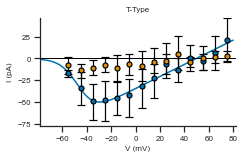

In [21]:
data = pd.concat([data_WT, data_KO], ignore_index=True)

fig, g = plt.subplots(figsize=(3.5, 2))

g = sns.lineplot(x="U_mV", y="I_pA_IV_diff", data=data, 
                 estimator=np.mean,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
                 lw=0,
                 hue='genotype',
                 palette=(color_palette[0], color_palette[1]),
             zorder=10, 
             err_style="bars",
             err_kws=error_style,
             fillstyle="full",
            **filled_marker_style)


### plot fit ###
g.plot(x_dummy,IV_func(x_dummy, *WT_IV_diff_popt), color = color_palette[0])
#g.plot(x_dummy,IV_func(x_dummy, *KO_IV_diff_popt),  color = color_palette[1])

g.axhline(0,0, color="black", lw=1)

plt.xlim(-78, 82)
plt.ylim(-78, 47)

g.set_title('T-Type')

g.set_ylabel("I (pA)")
g.set_xlabel("V (mV)")

sns.despine()

plt.legend([],[], frameon=False)
plt.savefig("IV_WT_KO_T-type.svg",  bbox_inches="tight")
plt.savefig("IV_WT_KO_T-type.png",  bbox_inches="tight")

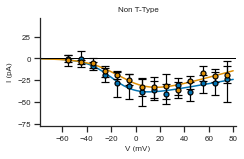

In [22]:
data = pd.concat([data_WT, data_KO], ignore_index=True)

fig, g = plt.subplots(figsize=(3.5, 2))

g = sns.lineplot(x="U_mV", y="I_pA_IV40", data=data, 
                 estimator=np.mean,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
                 lw=0,
                 hue='genotype',
                 palette=(color_palette[0], color_palette[1]),
             zorder=10, 
             err_style="bars",
             err_kws=error_style,
             fillstyle="full",
            **filled_marker_style)


### plot fit ###
g.plot(x_dummy,IV_func(x_dummy, *WT_IV40_popt), color = color_palette[0])
g.plot(x_dummy,IV_func(x_dummy, *KO_IV40_popt),  color = color_palette[1])

plt.xlim(-78, 82)
plt.ylim(-78, 47)


g.axhline(0,0, color="black", lw=1)

g.set_title('Non T-Type')

g.set_ylabel("I (pA)")
g.set_xlabel("V (mV)")

sns.despine()

plt.legend([],[], frameon=False)
#plt.savefig("IV_WT_KO.svg",  bbox_inches="tight")
plt.savefig("IV_WT_KO_NonT-type.svg",  bbox_inches="tight")
plt.savefig("IV_WT_KO_NonT-type.png",  bbox_inches="tight")

In [56]:
pd.concat((data_WT[(data_WT['U_mV']==-35) | ( data_WT['U_mV']==15)],
            data_KO[(data_KO['U_mV']==-35) | (data_KO['U_mV']==15)]), 
          axis=0, ignore_index=True)

,U_mV,Name2,animal,I_pA_IV,Name2_IV40,animal_IV40,I_pA_IV40,I_pA_IV_diff,genotype
0,-35,4537_WT_E-9_1,4537_WT,-59.698866,4537_WT_E-9_1,4537_WT,-15.615990,-44.082876,WT
1,15,4537_WT_E-9_1,4537_WT,-55.458148,4537_WT_E-9_1,4537_WT,-25.830303,-29.627845,WT
2,-35,4537_WT_E-10_2,4537_WT,-23.179860,4537_WT_E-10_2,4537_WT,-11.643671,-11.536189,WT
3,15,4537_WT_E-10_2,4537_WT,-30.465025,4537_WT_E-10_2,4537_WT,-28.103498,-2.361527,WT
4,-35,4720_WT_E-3_1,4720_WT,-85.529493,4720_WT_E-3_1,4720_WT,-1.674296,-83.855197,WT
5,15,4720_WT_E-3_1,4720_WT,-57.011446,4720_WT_E-3_1,4720_WT,-33.010884,-24.000562,WT
6,-35,4720_WT_E-6_4,4720_WT,-66.309299,4720_WT_E-6_4,4720_WT,-3.577234,-62.732065,WT
7,15,4720_WT_E-6_4,4720_WT,-16.034094,4720_WT_E-6_4,4720_WT,-16.392914,0.358820,WT
8,-35,4720_WT_E-7_5,4720_WT,-40.220167,4720_WT_E-7_5,4720_WT,-13.314841,-26.905327,WT
9,15,4720_WT_E-7_5,4720_WT,-43.627567,4720_WT_E-7_5,4720_WT,-29.648889,-13.978678,WT


In [58]:
ci_df_allV_WT.to_csv("df_ci_allV_WT.csv")
ci_df_allV_KO.to_csv("df_ci_allV_KO.csv")
pd.concat((data_WT[(data_WT['U_mV']==-35) | ( data_WT['U_mV']==15)],
            data_KO[(data_KO['U_mV']==-35) | (data_KO['U_mV']==15)]), 
          axis=0, ignore_index=True).to_csv("data_patch_clamp_-35mV_15mV_221130.csv")

Text(0.5, 1.0, 'WT \n L-Type')

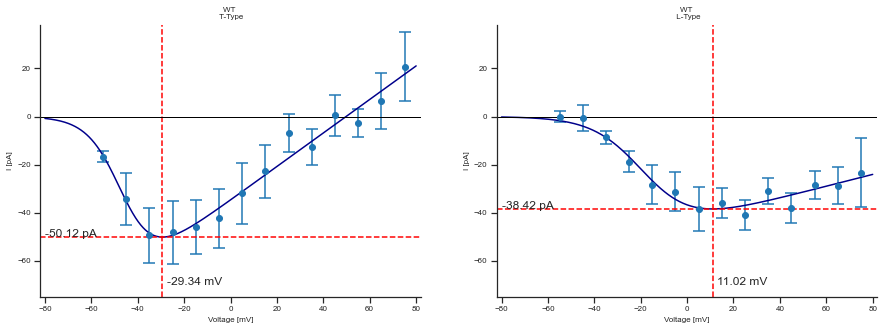

In [40]:
#### WT ####

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].errorbar(x=x_WT_IV_diff.values, y=y_WT_IV_diff, yerr=yerr_WT_IV_diff, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:blue")

axs[1].errorbar(x=x_WT_IV40.values, y=y_WT_IV40, yerr=yerr_WT_IV40, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:blue")


axs[0].plot(x_dummy,IV_func(x_dummy, *WT_IV_diff_popt), color = "darkblue")
axs[1].plot(x_dummy,IV_func(x_dummy, *WT_IV40_popt), color = "darkblue")

axs[0].axhline(y=IV_func(WT_IV_diff_min[0], *WT_IV_diff_popt),color = "red",  ls="--")
axs[0].text(-80,IV_func(WT_IV_diff_min[0], *WT_IV_diff_popt),\
            f"{round(IV_func(WT_IV_diff_min[0], *WT_IV_diff_popt),2)} pA", fontsize= 12 )

axs[0].axvline(x=WT_IV_diff_min[0],color = "red",  ls="--")
axs[0].text(WT_IV_diff_min[0]+2,-70, f"{round(WT_IV_diff_min[0],2)} mV", fontsize= 12 )


axs[1].axhline(y=IV_func(WT_IV40_min[0], *WT_IV40_popt),color = "red",  ls="--")
axs[1].text(-80,IV_func(WT_IV40_min[0], *WT_IV40_popt), \
            f"{round(IV_func(WT_IV40_min[0], *WT_IV40_popt),2)} pA", fontsize= 12 )

axs[1].axvline(x=WT_IV40_min[0],color = "red",  ls="--")
axs[1].text(WT_IV40_min[0]+2,-70, f"{round(WT_IV40_min[0],2)} mV", fontsize= 12 )

for ax in axs.flat:
    ax.set_xlim([-82, 82])
    ax.set_ylim([-75, 38])
    ax.set(xlabel='Voltage [mV]', ylabel='I [pA]')
    ax.axhline(0,0, color="black", lw=1)
    sns.despine()
    
axs[0].set_title('WT \n T-Type')
axs[1].set_title('WT \n L-Type')


Text(0.5, 1.0, 'KO \n L-Type')

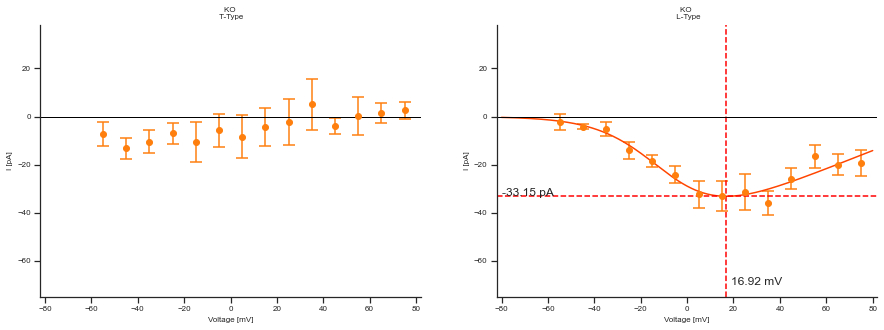

In [42]:
#### KO ####

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].errorbar(x=x_KO_IV_diff.values, y=y_KO_IV_diff, yerr=yerr_KO_IV_diff, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:orange")

axs[1].errorbar(x=x_KO_IV40.values, y=y_KO_IV40, yerr=yerr_KO_IV40, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:orange")

#axs[0].plot(x_dummy,IV_func(x_dummy, *KO_IV_diff_popt), color = "orangered")
axs[1].plot(x_dummy,IV_func(x_dummy, *KO_IV40_popt), color = "orangered")


# axs[0].axhline(y=IV_func(KO_IV_diff_min[0], *KO_IV_diff_popt),color = "red",  ls="--")
# axs[0].text(-80,IV_func(KO_IV_diff_min[0], *KO_IV_diff_popt),\
#             f"{round(IV_func(KO_IV_diff_min[0], *KO_IV_diff_popt),2)} pA", fontsize= 12 )

axs[1].axhline(y=IV_func(KO_IV40_min[0], *KO_IV40_popt),color = "red",  ls="--")
axs[1].text(-80,IV_func(KO_IV40_min[0], *KO_IV40_popt),\
            f"{round(IV_func(KO_IV40_min[0], *KO_IV40_popt),2)} pA", fontsize= 12 )


axs[1].axvline(x=KO_IV40_min[0],color = "red",  ls="--")
axs[1].text(KO_IV40_min[0]+2,-70, f"{round(KO_IV40_min[0],2)} mV", fontsize= 12 )

for ax in axs.flat:
    ax.set_xlim([-82, 82])
    ax.set_ylim([-75, 38])
    ax.set(xlabel='Voltage [mV]', ylabel='I [pA]')
    ax.axhline(0,0, color="black", lw=1)
    sns.despine()
    
axs[0].set_title('KO \n T-Type')
axs[1].set_title('KO \n L-Type')

In [18]:
# plt.rcParams.update({'font.size': 16})
# plt.rcParams.update({'lines.markersize': 8})

In [19]:
"""plt.style.use("seaborn-talk")
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 4

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False

plt.rcParams['svg.fonttype'] = 'none'




#### WT KO ####

fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

### plot data with errorbars ###
axs[0].errorbar(x=x_WT_IV_diff.values, y=y_WT_IV_diff, yerr=yerr_WT_IV_diff, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:blue")

axs[1].errorbar(x=x_WT_IV40.values, y=y_WT_IV40, yerr=yerr_WT_IV40, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:blue")


axs[0].errorbar(x=x_KO_IV_diff.values, y=y_KO_IV_diff, yerr=yerr_KO_IV_diff, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:orange")

axs[1].errorbar(x=x_KO_IV40.values, y=y_KO_IV40, yerr=yerr_KO_IV40, \
                capsize=6,capthick=1.5, marker="o",ls="", color="tab:orange")




### plot fit ###
axs[0].plot(x_dummy,IV_func(x_dummy, *WT_IV_diff_popt), color = "darkblue")
axs[1].plot(x_dummy,IV_func(x_dummy, *WT_IV40_popt), color = "darkblue")

axs[0].plot(x_dummy,IV_func(x_dummy, *KO_IV_diff_popt), color = "orangered")
axs[1].plot(x_dummy,IV_func(x_dummy, *KO_IV40_popt), color = "orangered")



### plot minimum ###
axs[0].axhline(y=IV_func(WT_IV_diff_min[0], *WT_IV_diff_popt), xmax=0.3, color = "darkblue",  ls=":")
#axs[0].text(-80,IV_func(WT_IV_diff_min[0], *WT_IV_diff_popt),\
   #         f"{round(IV_func(WT_IV_diff_min[0], *WT_IV_diff_popt),2)} pA", fontsize= 12 )

axs[0].axvline(x=WT_IV_diff_min[0],color = "darkblue",  ls=":", ymax=0.18)
#axs[0].text(WT_IV_diff_min[0]+2,-70, f"{round(WT_IV_diff_min[0],2)} mV", fontsize= 12 )


axs[1].axhline(y=IV_func(WT_IV40_min[0], *WT_IV40_popt),color = "darkblue",  ls=":", xmax=0.6)
#axs[1].text(-80,IV_func(WT_IV40_min[0], *WT_IV40_popt), \
 #           f"{round(IV_func(WT_IV40_min[0], *WT_IV40_popt),2)} pA", fontsize= 12 )

axs[1].axvline(x=WT_IV40_min[0],color = "darkblue",  ls=":", ymax=0.3)
#axs[1].text(WT_IV40_min[0]+2,-70, f"{round(WT_IV40_min[0],2)} mV", fontsize= 12 )


axs[1].axhline(y=IV_func(KO_IV40_min[0], *KO_IV40_popt),color = "orangered",  ls=":",xmax=0.65)
#axs[1].text(-80,IV_func(KO_IV40_min[0], *KO_IV40_popt),\
    #        f"{round(IV_func(KO_IV40_min[0], *KO_IV40_popt),2)} pA", fontsize= 12 )


axs[1].axvline(x=KO_IV40_min[0],color = "orangered",  ls=":", ymax=0.35)
#axs[1].text(KO_IV40_min[0]+2,-70, f"{round(KO_IV40_min[0],2)} mV", fontsize= 12 )





### set aesthetics ###

for ax in axs.flat:
    ax.set_xlim([-78, 82])
    ax.set_ylim([-70, 38])
    ax.axhline(0,0, color="black", lw=1)
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(20))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    #ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))


    sns.despine()
    
axs[0].set_title('T-Type')
axs[1].set_title('L-Type')

axs[0].set(xlabel='Voltage (mV)', ylabel='Current (pA)')
axs[1].set(xlabel='Voltage (mV)')


plt.subplots_adjust(wspace=0.05)

now = datetime.now().strftime("%d-%b-%Y %H:%M")
print("###### date and time ######")
print(now)

plt.savefig("IV_WT_KO.svg",  bbox_inches="tight")"""

'plt.style.use("seaborn-talk")\nplt.rcParams[\'axes.labelsize\'] = 18\nplt.rcParams[\'axes.titlesize\'] = 18\nplt.rcParams[\'xtick.labelsize\'] = 18\nplt.rcParams[\'ytick.labelsize\'] = 18\nplt.rcParams[\'legend.fontsize\'] = 18\nplt.rcParams[\'xtick.major.size\'] = 6\nplt.rcParams[\'ytick.major.size\'] = 6\nplt.rcParams[\'xtick.minor.size\'] = 4\n\nplt.rcParams[\'font.family\'] = [\'sans-serif\']\nplt.rcParams[\'font.sans-serif\'] = [\'Arial\']\nplt.rcParams[\'text.usetex\'] = False\n\nplt.rcParams[\'svg.fonttype\'] = \'none\'\n\n\n\n\n#### WT KO ####\n\nfig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)\n\n### plot data with errorbars ###\naxs[0].errorbar(x=x_WT_IV_diff.values, y=y_WT_IV_diff, yerr=yerr_WT_IV_diff,                 capsize=6,capthick=1.5, marker="o",ls="", color="tab:blue")\n\naxs[1].errorbar(x=x_WT_IV40.values, y=y_WT_IV40, yerr=yerr_WT_IV40,                 capsize=6,capthick=1.5, marker="o",ls="", color="tab:blue")\n\n\naxs[0].errorbar(x=x_KO_IV_diff.values

In [15]:
ci_df_allV_WT[["Genotype", "I_pA_IV_diff", "I_pA_IV_diff_ci95_lower", "I_pA_IV_diff_ci95_upper"]]

,Genotype,I_pA_IV_diff,I_pA_IV_diff_ci95_lower,I_pA_IV_diff_ci95_upper
-95,WT,NaN,NaN,NaN
-85,WT,NaN,NaN,NaN
-75,WT,NaN,NaN,NaN
-65,WT,NaN,NaN,NaN
-55,WT,-16.665606,-21.207753,-12.938132
-45,WT,-34.305029,-53.886694,-15.060169
-35,WT,-49.403031,-70.534183,-29.437876
-25,WT,-48.189695,-71.215520,-25.163869
-15,WT,-45.911943,-65.153390,-25.571222
-5,WT,-42.355015,-66.828063,-23.586696


In [13]:
ci_df_allV_WT["Genotype"] = "WT"

In [28]:
doc = docx.Document()
"""
df_n_animal_rec_cell_v2 = df_n_animal_rec_cells.reset_index()\
                        .rename(columns={"genotype": "Genotype",
                             "animal": "Animal",
                             "recording": "Recording",
                             "cell": "Cell",
                            })"""


ci_df_allV_WT["Genotype"] = "WT"
ci_df_allV_KO["Genotype"] = "KO"

ci_df_nonT = pd.concat([ci_df_allV_WT[["Genotype", "I_pA_IV40", "I_pA_IV40_ci95_lower", "I_pA_IV40_ci95_upper"]],
                       ci_df_allV_KO[["Genotype", "I_pA_IV40", "I_pA_IV40_ci95_lower", "I_pA_IV40_ci95_upper"]]])
ci_df_T = pd.concat([ci_df_allV_WT[["Genotype", "I_pA_IV_diff", "I_pA_IV_diff_ci95_lower", "I_pA_IV_diff_ci95_upper"]],
                     ci_df_allV_KO[["Genotype", "I_pA_IV_diff", "I_pA_IV_diff_ci95_lower", "I_pA_IV_diff_ci95_upper"]]])

ci_df_nonT = ci_df_nonT.round(decimals=3)\
            .reset_index()\
            .rename(columns={"index": "V (mV)",
                             "I_pA_IV40": "I (pA)",
                             "I_pA_IV40_ci95_lower": "95% CI\n(lower limit)",
                             "I_pA_IV40_ci95_upper": "95% CI\n(upper limit)",

                            })


ci_df_T = ci_df_T.round(decimals=3)\
            .reset_index()\
            .rename(columns={"index": "V (mV)",
                             "I_pA_IV_diff": "I (pA)",
                             "I_pA_IV_diff_ci95_lower": "95% CI\n(lower limit)",
                             "I_pA_IV_diff_ci95_upper": "95% CI\n(upper limit)",

                            })
            

for df in [ci_df_T, ci_df_nonT, ]:

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(df.shape[0]+1, df.shape[1])
    t.style = 'Light Grid'


    # add the header rows.
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    # add the rest of the data frame
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])


    # change font style  
    for row in t.rows:
        for cell in row.cells:
            paragraphs = cell.paragraphs
            for paragraph in paragraphs:
                for run in paragraph.runs:
                    font = run.font
                    font.size= Pt(11)
                    font.name = 'Arial'
    doc.add_page_break()

  
        
# save the doc
doc.save('patch_clamp_table_summary.docx')